In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as mt

The parameters for the simulation are declared:

In [2]:
N2 = 1e-5 # s^-2, interior stratification
theta = 5e-3 # angle of the slope
f = 1e-4 # s^-1 coriolis parameter
Vinf = 0.05 # m s^-1 interior velocity

The Slope Burger Number is defined as 
$$ S_\infty = \dfrac{N_\infty\theta}{f}$$
so we calculate it to be

In [3]:
Sinf = (N2**(0.5)*theta)/f # Slope Burger Number
Sinf

0.15811388300841897

The gamma parameter is defined to be 
$$ \gamma = (1+S_\infty^2)^{-1}$$
so we calculate it to be

In [4]:
gamma = (1+Sinf**2)**(-1) # 0 PV parameter
gamma

0.9756097560975611

The boundary layer height is defined to be 
$$ h = \dfrac{fV_\infty}{\gamma N^2_\infty\theta} $$
so we see it is

In [5]:
h = mt.ceil((f*Vinf)/(gamma*N2*theta)) # m height
h

103

Note that we round this to the next highest whole number to prevent issues at the boundary height in the simulation. 

We define the modified coriolis parameter to be 
$$ f^*=(f^2+N^2_\infty\theta)^{0.5} $$
which we calculate to be 

In [6]:
fstar = (f**2+theta**2*N2)**(0.5) # s^-1 modified coriolis frequency
fstar

0.00010124228365658294

Richardson number:
$$ Ri\equiv \dfrac{f^2(1-\gamma)}{N^2_\infty\theta^2\gamma^2}$$
and for $\gamma=(1+S^2_\infty)^{-1}$
$$ Ri\equiv \dfrac{f^2(1-\gamma)}{N^2_\infty\theta^2\gamma^2}=1+S^2_\infty$$
so we calculate

In [7]:
Ri = 1+Sinf**2
Ri

1.025

Rossby Number:
$$ Ro\equiv \dfrac{\gamma N_\infty^2\theta^2}{f^2}=\dfrac{S^2_\infty}{1+S^2_\infty}$$
so we calculate

In [8]:
Ro = (Sinf**2)/(1+Sinf**2)
Ro

0.02439024390243903

The initial conditions and the shear parameter are declared below:

In [9]:
delta = 0.1 # perturbed shear parameter
uo = 0 # s^-1 initial pertubation shear u
vo = gamma*delta*N2*theta/f # s^-1 initial pertubation shear v
bo = 0 # s^-1 initial buoyancy shear pertubation # vₒ*(N2*theta/(f))*0.1

Now, we define the oscillations and calculate them:

In [10]:
def shear_osc(t):
        u = uo*np.cos(fstar*t)+(f*vo+bo*theta)/(fstar)*np.sin(fstar*t)
        v = (f**2*vo+f*bo*theta)/(fstar**2)*np.cos(fstar*t)-(f*uo)/(fstar)*np.sin(fstar*t)+((fstar**2-f**2)*vo-f*theta*bo)/(fstar**2)
        N = N2*theta*(f*vo+bo*theta)/(fstar**2)*np.cos(fstar*t)-N2*theta*(uo)/(fstar)*np.sin(fstar*t)+bo-N2*theta*(f*vo+theta*bo)/(fstar**2)
        return [u,v,N]

In [11]:
t = np.arange(0,(2*np.pi)/fstar,0.1)
perts = shear_osc(t)

We know that the ertel potential vorticity is defined to be 
$$ q\equiv fN^2_\infty(1-\gamma)-\dfrac{N^4_\infty \theta^2\gamma}{f}+N^2_\infty\theta v_o-fb_o$$
so we calculate

In [12]:
PV = f*N2*(1-gamma)-(N2**2*theta**2*gamma)/f+N2*theta*vo-f*bo # s^-2 potential vorticity
PV

2.4390243902438097e-12

The mininum frequency in a baroclinic flow is given by for our case
$$ \omega_{\text{min}}\equiv \sqrt{\dfrac{fq}{N^2_\infty(1-\gamma)}}$$
which we calculate to be

In [13]:
omega_min = (f*PV/(N2*(1-gamma)))**(0.5)
omega_min

3.162277660168325e-05

Note that under our definition of $\gamma$ this reduces to 
$$\omega_{\text{min}}=f\sqrt{\delta}$$
which we can verify as

In [14]:
omega_min_delta = (f**2*delta)**(0.5)
omega_min_delta

3.1622776601683795e-05

In [15]:
j = np.where(t==round(0.25*(2*np.pi)/fstar,1))[0]
t[j[0]]

15515.2

In [16]:
N2

1e-05

In [17]:
def x2x1(i,perts):
    return (1-gamma)*h/theta + perts[2][i]*h/(N2*theta)

In [18]:
def angle(i,perts):
    return np.arctan(h/x2x1(i,perts))

In [19]:
np.pi - angle(j,perts)

array([2.91822124])

In [20]:
k = np.where(t==round(0.5*(2*np.pi)/fstar,1))
t[k[0]]

array([31030.4])

In [25]:
amax = (angle(k,perts)-angle(j,perts))[0]
amax

0.0260230153719401

In [26]:
intlphi = np.pi -angle(j,perts)

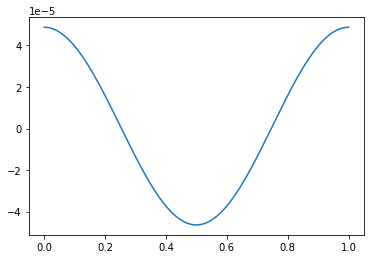

In [50]:
plt.plot(t*(fstar)/(2*np.pi),perts[1])

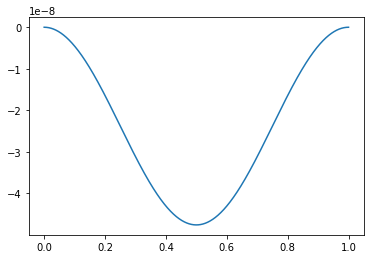

In [51]:
plt.plot(t*(fstar)/(2*np.pi),perts[2])

In [64]:
np.sin(intlphi)+N2*theta*f*vo/fstar*(np.cos(fstar*np.pi/(2*fstar))-1)*h

array([0.22151853])

In [63]:
np.sin(intlphi)

array([0.22151853])

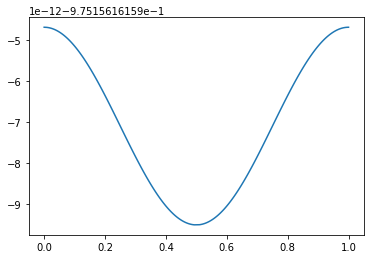

In [57]:
plt.plot(t*(fstar)/(2*np.pi),N2*theta*f*vo/fstar*np.cos(fstar*t)+np.cos(intlphi))

In [87]:
q = (np.sin(intlphi))**(-1)*(2*fstar**2*1e-8)/(1e-8*(f*vo*np.sqrt(2)+fstar*vo+fstar*N2**(0.5)*gamma*Sinf))
q

array([1.51155518])

In [88]:
2*fstar/np.pi*np.log(q)

array([2.66279843e-05])

In [ ]:
uma = max(perts[0])
vma = max(perts[1])
bma = max(perts[2])
print(f"u max{uma}")
print(f"v max{vma}")
print(f"b max{bma}")

In [ ]:
umi = min(perts[0])
vmi = min(perts[1])
bmi = min(perts[2])
print(f"u min{umi}")
print(f"v min{vmi}")
print(f"b min{bmi}")

In [ ]:
plt.plot(perts[0],perts[1])
plt.hlines(0,umi,uma,colors="k")
plt.vlines(0,0,vma,colors="k")
plt.gca().set_aspect('equal')

In [ ]:
plt.plot(perts[0],perts[2])
plt.hlines(0,umi,uma,colors="k")
plt.vlines(0,bmi,bma,colors="k")

In [ ]:
plt.plot(perts[2])
# plt.gca().set_aspect('equal')

In [ ]:
z = np.arange(0,h+1,1)
# plt.plot(vprofile,z,color="r")
vprofile = Vinf-gamma*theta*N2/f*(h-z)
plt.plot(vprofile,z,color="b")
plt.plot(vprofile+perts[1][-1]*(h-z),z,c="y")
# plt.ylim([0,1])

In [ ]:
# plt.plot(vprofile,z,color="r")
uprofile = h*uo*np.ones(np.size(z))
# plt.plot(uprofile,z,color="b")
plt.plot(perts[0][0]*(h-z),z,c="y")
plt.vlines(0,0,h)
# plt.ylim([0,1])

In [ ]:
gamma1
Sinf21

In [ ]:
bint = N2*(h+z)+N2*theta*100
bprofile = N2*z+gamma*N2*(h-z)+N2*theta*100
plt.plot(bint,z+h,"y")
plt.plot(bprofile,z,c="b")
plt.plot(bprofile+perts[2][15515]*(h-z),z,c="r")
# plt.ylim([99,111])

In [ ]:
PV = f*N2*(1-gamma)-(N2**2*theta**2*gamma)/f+N2*theta*vo-f*bo
# omega_min = np.sqrt(PV/N2)
PV

In [ ]:
fstar

In [ ]:
np.Im